In [1]:
from heapy.util.data import msg_format
from heapy.util.time import fermi_utc_to_met
from heapy.data.retrieve import gbmRetrieve
from heapy.data.geometry import gbmGeometry
from heapy.data.event import gbmTTE
from heapy.data.response import gbmResponse

In [2]:
utc = '2024-02-19T06:21:42'
fermi_met = fermi_utc_to_met(utc)

In [3]:
gbm_rtv = gbmRetrieve.from_utc(utc=utc, t1=-400, t2=400)
gbm_rtv.rtv_res

{'utc': '2024-02-19T06:21:42.000',
 't1': -400.0,
 't2': 400.0,
 'datapath': '/Users/jyang/Documents/fermi/data/gbm/daily',
 'tte': {'n0': ['/Users/jyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n0_240219_06z_v00.fit.gz'],
  'n1': ['/Users/jyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n1_240219_06z_v00.fit.gz'],
  'n2': ['/Users/jyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n2_240219_06z_v00.fit.gz'],
  'n3': ['/Users/jyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n3_240219_06z_v00.fit.gz'],
  'n4': ['/Users/jyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n4_240219_06z_v00.fit.gz'],
  'n5': ['/Users/jyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n5_240219_06z_v00.fit.gz'],
  'n6': ['/Users/jyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n6_240219_06z_v00.fit.gz'],
  'n7': ['/Users/jyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n7_240219_06z_v00.fit.gz'

In [4]:
gbm_geo = gbmGeometry(utc, poshist_file=gbm_rtv.rtv_res['poshist'][0])

In [5]:
gbm_geo.saa_passage()

array(False)

In [6]:
gbm_geo.location_visible(ra=80.016, dec=25.541)

array([ True])

In [7]:
dets = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9','na','nb','b0','b1']

for det in dets:
    angle = gbm_geo.detector_angle(ra=80.016, dec=25.541, det=det)
    print(det, angle)

n0 57.40267111984303
n1 57.59842957622196
n2 61.09974603073652
n3 105.78367734887475
n4 151.96659750908262
n5 109.3588447183001
n6 70.98824728203138
n7 83.91454465303927
n8 117.43231754979529
n9 23.381040023779185
na 28.851258514959255
nb 71.03535099237897
b0 112.3796119823658
b1 67.62038801763423


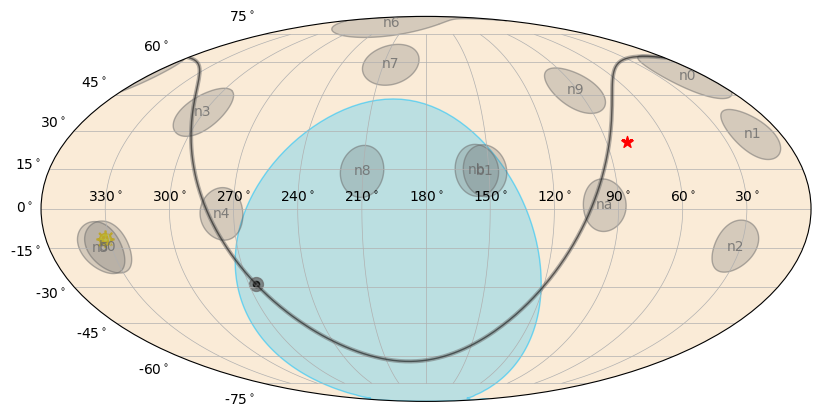

In [8]:
gbm_geo.extract_skymap(ra=80.016, dec=25.541, savepath='./geometry')

In [9]:
gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte']['n9'])
gbm_tte.event

TIME,PHA,ENERGY,DEAD_TIME
s,none,keV,
float64,int16,float64,float64
730015085.000096,15,19.0,2.6
730015085.000168,24,35.0,2.6
730015085.000454,49,97.0,2.6
730015085.000886,23,32.0,2.6
730015085.00157,21,29.0,2.6
730015085.003632,62,151.0,2.6
730015085.004286,126,961.0,2.6
730015085.005996,61,146.0,2.6


In [10]:
gbm_tte.timezero = fermi_met

In [11]:
gbm_tte.filter_time([-200, 300])
gbm_tte.event

TIME,PHA,ENERGY,DEAD_TIME
s,none,keV,
float64,int16,float64,float64
730016307.000038,1,5.0,2.6
730016307.001172,40,69.0,2.6
730016307.001322,7,11.0,2.6
730016307.001628,44,79.0,2.6
730016307.002356,21,29.0,2.6
730016307.00277,101,474.0,2.6
730016307.004216,8,12.0,2.6
730016307.004846,29,42.0,2.6


In [12]:
gbm_tte.filter_energy([10, 1000])
gbm_tte.event

TIME,PHA,ENERGY,DEAD_TIME
s,none,keV,
float64,int16,float64,float64
730016307.001172,40,69.0,2.6
730016307.001322,7,11.0,2.6
730016307.001628,44,79.0,2.6
730016307.002356,21,29.0,2.6
730016307.00277,101,474.0,2.6
730016307.004216,8,12.0,2.6
730016307.004846,29,42.0,2.6
730016307.00625,17,22.0,2.6


In [13]:
print(msg_format('extract light curve for n9'))

gbm_tte.lc_binsize = 2
gbm_tte.extract_curve(savepath='./n9/curve', show=True)


+------------------------------------------------+
 extract light curve for n9
+------------------------------------------------+


In [14]:
print(msg_format('calculate txx for n9'))
gbm_tte.calculate_txx(xx=0.9, savepath='./n9/curve/t90')


+------------------------------------------------+
 calculate txx for n9
+------------------------------------------------+

+------------------------------------------------+
 id#  Txx       Txx-    Txx+    Txx1    Txx2    
+-----------------------------------------------+
 1    57.324    4.821   7.663   4.874   62.197  
+------------------------------------------------+


In [15]:
print(msg_format('extract spectrum for n9'))

gbm_tte.filter_time([-400, 400])

gbm_tte.spec_slices = [[0, 70]]
gbm_tte.extract_spectrum(savepath='./n9/spectrum', show=True)


+------------------------------------------------+
 extract spectrum for n9
+------------------------------------------------+


In [16]:
gbm_resp = gbmResponse(utc, 
                       'n9', 
                       gbm_rtv.rtv_res['cspec_pha']['n9'][0], 
                       gbm_rtv.rtv_res['poshist'][0])
gbm_resp.extract_response(ra=80.016, 
                          dec=25.541, 
                          spec_slices=[[0, 70]], 
                          savepath=f'./n9/spectrum')

/Users/jyang/miniforge3/lib/python3.10/site-packages/responsum/response.py:108: RuntimeWarning:

Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.380217552185059)



In [17]:
for det in ['n9', 'na']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.filter_time([-200, 300])
    gbm_tte.filter_energy([10, 1000])

    print(msg_format(f'extract light curve for {det}'))
    
    gbm_tte.lc_binsize = 2
    gbm_tte.extract_curve(savepath=f'./{det}/curve', show=True)


+------------------------------------------------+
 extract light curve for n9
+------------------------------------------------+



+------------------------------------------------+
 extract light curve for na
+------------------------------------------------+


In [18]:
for det in ['n9', 'na']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.filter_time([-200, 300])
    gbm_tte.filter_energy([10, 1000])

    print(msg_format(f'calculate txx for {det}'))
    
    gbm_tte.lc_binsize = 2
    gbm_tte.calculate_txx(xx=0.9, savepath=f'./{det}/curve/t90')
    gbm_tte.calculate_txx(xx=1.0, savepath=f'./{det}/curve/t100')


+------------------------------------------------+
 calculate txx for n9
+------------------------------------------------+

+------------------------------------------------+
 id#  Txx       Txx-    Txx+    Txx1    Txx2    
+-----------------------------------------------+
 1    57.324    5.305   7.957   5.372   62.696  
+------------------------------------------------+

+------------------------------------------------+
 id#  Txx       Txx-    Txx+    Txx1    Txx2    
+-----------------------------------------------+
 1    68.290    6.589   9.962   1.384   69.675  
+------------------------------------------------+

+------------------------------------------------+
 calculate txx for na
+------------------------------------------------+

+------------------------------------------------+
 id#  Txx       Txx-    Txx+    Txx1    Txx2    
+-----------------------------------------------+
 1    49.849    13.544  13.634  20.834  70.683  
+-----------------------------------------------

In [19]:
for det in ['n9', 'na', 'b1']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.filter_time([-400, 400])
    
    print(msg_format(f'extract spectrum for {det}'))
    
    gbm_tte.spec_slices = [[0, 70]]
    gbm_tte.extract_spectrum(savepath=f'./{det}/spectrum', show=True)


+------------------------------------------------+
 extract spectrum for n9
+------------------------------------------------+



+------------------------------------------------+
 extract spectrum for na
+------------------------------------------------+



+------------------------------------------------+
 extract spectrum for b1
+------------------------------------------------+


In [20]:
for det in ['n9', 'na', 'b1']:
    gbm_resp = gbmResponse(utc, 
                           det, 
                           gbm_rtv.rtv_res['cspec_pha'][det][0], 
                           gbm_rtv.rtv_res['poshist'][0])
    gbm_resp.extract_response(ra=80.016, 
                              dec=25.541, 
                              spec_slices=[[0, 70]], 
                              savepath=f'./{det}/spectrum')

/Users/jyang/miniforge3/lib/python3.10/site-packages/responsum/response.py:108: RuntimeWarning:

Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (3.668320417404175)

